<a href="https://colab.research.google.com/github/Rh-RAP/Business_Intelligence_Renfe/blob/main/5_proyecto_final_renfe(Rhuana_Reis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Proyecto final - Data Analytics y Business Intelligence

Recibimos dos datasets:

1. `renfe.csv`: Información de búsquedas de billetes que se ha extrajo de la página de Renfe.
2. `coordenadas_ciudades.csv`: Latitud y longitud de provincias españolas.

Queremos usar estos datasets para un modelo de Machine Learning que utilizaremos para predecir los precios de los billetes. Y, para ello, necesitamos limpiar, explorar y pre-procesar el dataset.

## Reglas de juego

1. El proyecto se debe entregar en grupos de dos o individualmente. 
2. Cada respuesta correcta suma un punto.
3. La calificación final consistirá en la suma de todos los puntos obtenidos sobre el total de puntos posibles.


## Diccionario de datos

Esta es la información provista:

### `renfe.csv`
- `FECHA_CONSULTA`: Fecha en la que se consultó la página.
- `FECHA_INICIO`: Fecha de inicio del trayecto.
- `FECHA_FIN`: Fecha de finalización del trayecto.
- `CIUDAD_ORIGEN`: Ciudad de origen del trayecto.
- `CIUDAD_DESTINO`: Ciudad destino del trayecto.
- `TIPO_TREN`: Tipo de tren.
- `TIPO_TARIFA`: Tipo de tarifa del billete.
- `CLASE`: Clase del asiento seleccionado.
- `PRECIO`: Precio del tren seleccionado.

### `coordenadas_ciudades.csv`
- `ciudad`: Nombre de la ciudad.
- `latitud`: Coordenada de latitud de la ciudad.
- `longitud`: Coordenada de longitud de la ciudad.

## Importar librerías

In [ ]:
import pandas as pd

## P0: Lee el dataset `renfe.csv`

In [ ]:
renfe_df = pd.read_csv('renfe.csv', sep= ';')

## P1: Visualiza las primeras y las últimas filas del dataset

In [ ]:
renfe_df.head() #las primeras filas
renfe_df.tail() #las últimas filas

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,Turista,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,Turista,47.30
383567,2019-05-27 15:04:14,2019-06-16 18:35:00,2019-06-16 20:21:00,VALENCIA,MADRID,AVE,Flexible,Turista,73.10


## P2: ¿Cuantas filas y columnas tiene el dataset?

In [ ]:
renfe_df.shape #el dataframe tiene 383568 filas y 9 columnas

(383568, 9)

## P3: Cambia los nombres de todas las columnas a minúsculas

In [ ]:
renfe_df.columns = renfe_df.columns.str.lower() #cambia los nombres de las columnas para minusculas
renfe_df.head()

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


## P4: Muestra los tipos de datos de cada columna

In [ ]:
renfe_df.info() #muestra que todas las columnas tienen el tipo de dato object, excepto la columna de precio que tinen datos tipo float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fecha_consulta  383568 non-null  object 
 1   fecha_inicio    383568 non-null  object 
 2   fecha_fin       383568 non-null  object 
 3   ciudad_origen   383568 non-null  object 
 4   ciudad_destino  383568 non-null  object 
 5   tipo_tren       383568 non-null  object 
 6   tipo_tarifa     382225 non-null  object 
 7   clase           382225 non-null  object 
 8   precio          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


## P5: Cambia los tipos de datos que creas que creas incorrectos, por los tipos adecuados

In [ ]:
renfe_df['fecha_consulta'] = pd.to_datetime(renfe_df['fecha_consulta'])#converte las fechas en tipo de datos datetime
renfe_df['fecha_inicio'] = pd.to_datetime(renfe_df['fecha_inicio']) 
renfe_df['fecha_fin'] = pd.to_datetime(renfe_df['fecha_fin'])
#renfe_df['ciudad_origen'] = renfe_df['ciudad_origen'].astype('string')
renfe_df[['ciudad_origen','ciudad_destino','tipo_tren', 'tipo_tarifa','clase']] = renfe_df[['ciudad_origen','ciudad_destino','tipo_tren', 'tipo_tarifa','clase']].astype('string')
#converti todas demas colunas en sritring
renfe_df.info() #info al final para comprobar los cambios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fecha_consulta  383568 non-null  datetime64[ns]
 1   fecha_inicio    383568 non-null  datetime64[ns]
 2   fecha_fin       383568 non-null  datetime64[ns]
 3   ciudad_origen   383568 non-null  string        
 4   ciudad_destino  383568 non-null  string        
 5   tipo_tren       383568 non-null  string        
 6   tipo_tarifa     382225 non-null  string        
 7   clase           382225 non-null  string        
 8   precio          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), string(5)
memory usage: 26.3 MB


## P6: Filas duplicadas

In [ ]:
renfe_df[renfe_df.duplicated()] #mostra todas las filas duplicadas

,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio
67494,2019-04-29 23:15:13,2019-05-14 06:20:00,2019-05-14 14:25:00,MADRID,BARCELONA,LD-AVE,Promo,Turista,NaN
72194,2019-05-13 05:35:59,2019-05-26 17:30:00,2019-05-26 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
82429,2019-04-30 09:09:51,2019-05-19 17:30:00,2019-05-19 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
88401,2019-05-15 23:37:01,2019-06-21 21:05:00,2019-06-21 23:32:00,VALENCIA,MADRID,INTERCITY,<NA>,<NA>,NaN
106308,2019-08-15 19:26:51,2019-08-23 21:03:00,2019-08-23 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
107458,2019-06-12 11:51:44,2019-06-16 17:30:00,2019-06-16 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,TuristaSólo plaza H,55.40
143395,2019-08-17 03:22:19,2019-09-01 21:03:00,2019-09-01 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,NaN
159167,2019-05-16 13:12:07,2019-06-29 21:05:00,2019-06-29 23:32:00,VALENCIA,MADRID,INTERCITY,<NA>,<NA>,NaN
163046,2019-06-12 05:22:45,2019-07-25 21:03:00,2019-07-25 23:28:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,25.50
170659,2019-05-15 21:26:30,2019-06-23 21:05:00,2019-06-23 23:32:00,VALENCIA,MADRID,INTERCITY,<NA>,<NA>,NaN


### P6.1: ¿Cuántas filas duplicadas tiene el dataset?

In [ ]:
renfe_df[renfe_df.duplicated()].shape #el dataset tiene 33 filas duplicadas

(33, 9)

### P6.2: Quita las filas duplicadas

In [ ]:
renfe_df= renfe_df.drop_duplicates() #este metodo elimina las filas duplicadas
renfe_df.shape #ahora el dataset tiene 383535 filas, demostrando que las 33 filas duplicadas fueron quitadas

(383535, 9)

## P7: Valores nulos y análisis de `precio`

### P7.1: ¿Que porcentaje de valores nulos hay por cada columna?

In [ ]:
renfe_df.isnull().sum() #mostra la soma de valores nulos en cada columna, vemos que solamente las columnas: tipo_tarifa, clase y precio tienen valores nulos

fecha_consulta        0
fecha_inicio          0
fecha_fin             0
ciudad_origen         0
ciudad_destino        0
tipo_tren             0
tipo_tarifa        1338
clase              1338
precio            28515
dtype: int64

### P7.2: ¿Cual es el mínimo, percentiles importantes (25%, 50%, 75%) y el máximo de `precio`?

In [ ]:
renfe_df.precio.describe()
#precio mínimo=0
#25%= 41.20000/ 50%=58.150000/ 75%=76.300000
#precio máximo= 342.80000

count    355020.000000
mean         61.436162
std          25.696218
min           0.000000
25%          41.200000
50%          58.150000
75%          76.300000
max         342.800000
Name: precio, dtype: float64

### P7.3: ¿Hay algo raro en el valor mínimo de `precio`? Quita las filas con ese valor del dataset

In [ ]:
renfe_df.drop(renfe_df.loc[renfe_df['precio']== 0].index, inplace=True) #quita las filas donde precio=0 
renfe_df.precio.describe() #ahora el valor minimo del precio es 12.850000

count    355018.000000
mean         61.436508
std          25.695877
min          12.850000
25%          41.200000
50%          58.150000
75%          76.300000
max         342.800000
Name: precio, dtype: float64

### P7.4: Reemplaza los valores nulos en `precio` por la media de esa columna

In [ ]:
mean_precio = renfe_df.precio.mean() #nombre la media como mean_precio
renfe_df.loc[renfe_df.precio.isna(), 'precio'] = mean_precio  #igualé los valores nulos a media
assert renfe_df.precio.isna().any() == False

### P7.5: Quita las filas donde `clase` o `tipo_tarifa` sean nulos

In [ ]:

renfe_df.drop(renfe_df.loc[renfe_df['clase'].isnull()].index, inplace=True) #Quité los valores nulos de clase
renfe_df.drop(renfe_df.loc[renfe_df['tipo_tarifa'].isnull()].index, inplace=True) #Lo mismo com la columna tipo_tarifa
renfe_df.isnull().sum() #ahora se puede ver que ya no hay valores nulos en ninguna de las columnas

fecha_consulta    0
fecha_inicio      0
fecha_fin         0
ciudad_origen     0
ciudad_destino    0
tipo_tren         0
tipo_tarifa       0
clase             0
precio            0
dtype: int64

## P8: Tiempo de viaje

### P8.1: Calcula el tiempo de viaje en minutos (fecha_fin - fecha_inicio)

In [ ]:
tiempo_de_viaje = (renfe_df.fecha_fin - renfe_df.fecha_inicio)
tiempo_de_viaje= tiempo_de_viaje.astype('timedelta64[m]') #para convertir a minutos
tiempo_de_viaje

0         158.0
1         190.0
2         150.0
3         460.0
4         179.0
          ...  
383563    109.0
383564    190.0
383565    100.0
383566    141.0
383567    106.0
Length: 382195, dtype: float64

### P8.2: Haz un histograma de la variable que acabas de crear (`tiempo_de_viaje`)

<AxesSubplot:>

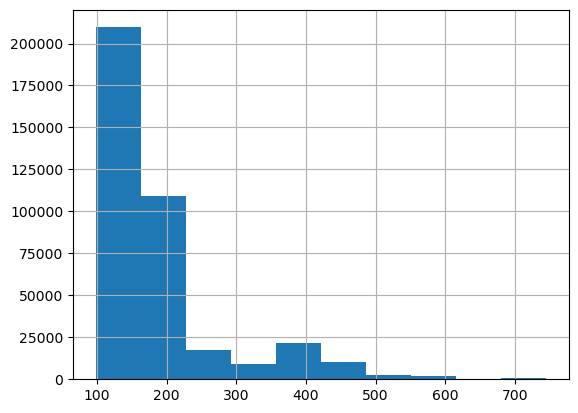

In [ ]:
import matplotlib as plt 
tiempo_de_viaje.hist()

## P9: Extrae el día, el nombre del día, el mes y la hora de `fecha_inicio`

In [ ]:
renfe_df['nueva_fecha'] = [d.date() for d in renfe_df['fecha_inicio']] #columna con solamente las fechas
renfe_df['nombre_dia'] = [d.weekday() for d in renfe_df['fecha_inicio']] #columna con los nombres del día

In [ ]:

#los dias de la semana estaban representados por numeros(0-6), para la mejor comprension los nombré
renfe_df.loc[renfe_df['nombre_dia']== 0 , 'nombre_dia'] = 'lunes'
renfe_df.loc[renfe_df['nombre_dia']== 1 , 'nombre_dia'] = 'martes'
renfe_df.loc[renfe_df['nombre_dia']== 2 , 'nombre_dia'] = 'miercules'
renfe_df.loc[renfe_df['nombre_dia']== 3 , 'nombre_dia'] = 'jueves'
renfe_df.loc[renfe_df['nombre_dia']== 4 , 'nombre_dia'] = 'viernes'
renfe_df.loc[renfe_df['nombre_dia']== 5 , 'nombre_dia'] = 'sabado'
renfe_df.loc[renfe_df['nombre_dia']== 6 , 'nombre_dia'] = 'domingo'

In [ ]:
renfe_df['nueva_fecha'] = renfe_df['nueva_fecha'].astype('string') #conberti la columna de fechas en string para hacer un slip.
columnas_fecha= renfe_df.nueva_fecha.str.split('-', n=3, expand=True)#dividir la columna de fechas en 3(año/mes/dia)
columnas_fecha
renfe_df['día']= columnas_fecha[2]# cria una nueva columna con los dias
renfe_df['mes'] =columnas_fecha[1]# cria una nueva columna con los meses
renfe_df['hora_inicio'] = [d.time() for d in renfe_df['fecha_inicio']]#nueva columna con la hora de inicio
renfe_df.head()


,fecha_consulta,fecha_inicio,fecha_fin,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,nueva_fecha,nombre_dia,día,mes,hora_inicio
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,2019-06-28,viernes,28,06,20:36:00
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,2019-07-14,domingo,14,07,10:00:00
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,2019-05-23,jueves,23,05,13:40:00
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,2019-05-29,miercules,29,05,14:50:00
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,2019-06-26,miercules,26,06,13:25:00


## P10: Quita las columnas `fecha_consulta`, `fecha_inicio` y `fecha_fin` del dataset

In [ ]:
renfe_df.drop(['fecha_consulta', 'fecha_inicio', 'fecha_fin'], axis=1, inplace= True) #para quitar las colimnas del dataset
renfe_df.head()

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,nueva_fecha,nombre_dia,día,mes,hora_inicio
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,2019-06-28,viernes,28,06,20:36:00
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,2019-07-14,domingo,14,07,10:00:00
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,2019-05-23,jueves,23,05,13:40:00
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,2019-05-29,miercules,29,05,14:50:00
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,2019-06-26,miercules,26,06,13:25:00


## P11: Lee el dataset `coordenadas_ciudades.csv` y únelo con al dataset que has procesado hasta ahora (utiliza `ciudad_destino` para el `join`)

In [ ]:
ciudad_df = pd.read_csv('coordenadas_ciudades.csv')
ciudad_destino_df = renfe_df.join(ciudad_df)
ciudad_destino_df

,ciudad,latitud,longitud
0,MADRID,40.416705,-3.703582
1,BARCELONA,41.382894,2.177432
2,SEVILLA,37.388630,-5.995340
3,VALENCIA,39.469901,-0.375951
4,PONFERRADA,42.545412,-6.593872


In [ ]:
mean_precio_ciudad = renfe_df.groupby(['ciudad_destino']).mean(['precio']) #precio medio por ciudad de destino
mean_precio_ciudad['ciudad'] = mean_precio_ciudad.index #convertir el index en una columna para unirla con el dataframe
ciudad_destino_df= ciudad_destino_df.merge(mean_precio_ciudad , on='ciudad', how='left', suffixes=('', '_medio')) #aqui uso el merge para unir la media en el dataframe
ciudad_destino_df

,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,nueva_fecha,nombre_dia,día,mes,hora_inicio,ciudad,latitud,longitud,precio_medio
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,2019-06-28,viernes,28,06,20:36:00,MADRID,40.416705,-3.703582,60.700061
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,2019-07-14,domingo,14,07,10:00:00,BARCELONA,41.382894,2.177432,85.360833
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,2019-05-23,jueves,23,05,13:40:00,SEVILLA,37.388630,-5.995340,58.818389
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,2019-05-29,miercules,29,05,14:50:00,VALENCIA,39.469901,-0.375951,42.637584
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,2019-06-26,miercules,26,06,13:25:00,PONFERRADA,42.545412,-6.593872,45.650328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382190,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,2019-05-10,viernes,10,05,19:40:00,NaN,NaN,NaN,NaN
382191,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,2019-08-05,lunes,05,08,20:00:00,NaN,NaN,NaN,NaN
382192,VALENCIA,MADRID,AVE,Promo,Turista,27.80,2019-04-29,lunes,29,04,16:15:00,NaN,NaN,NaN,NaN
382193,MADRID,SEVILLA,AVE,Promo,Turista,47.30,2019-07-07,domingo,07,07,15:00:00,NaN,NaN,NaN,NaN


## P12: Gráfica en un mapa el precio medio por ciudad de destino

In [ ]:
#grafica en el mapa
import plotly.express as px
fig = px.scatter_geo(ciudad_destino_df, lat= 'latitud', lon= 'longitud', color="ciudad", hover_name= 'ciudad', hover_data= ['precio_medio',], size= 'precio_medio'
                    )
fig.show()

## P13: Haz una tabla de correlación, ¿hay variables númericas correladas con el precio?

In [ ]:
ciudad_destino_df.corr().style.background_gradient(cmap="RdYlBu")
#la latitud y longitud tambien se correladan con el precio, ya que el precio es determinado tambien tomando como base la distancia 


,precio,latitud,longitud
precio,1.000000,0.570656,0.387213
latitud,0.570656,1.000000,0.137218
longitud,0.387213,0.137218,1.000000


## P14: Relación entre variables del dataset y `precio`

### P14.1: Haz un scatter plot de precio vs. tiempo de viaje

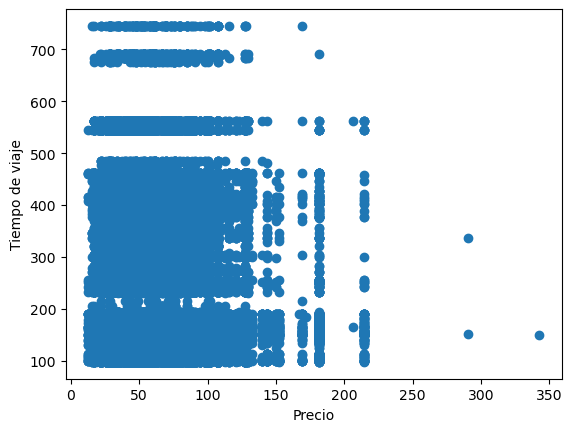

In [ ]:
import matplotlib.pyplot as plt
ciudad_destino_df['tiempo de viaje'] = tiempo_de_viaje #crie una nueva columna al df con la variable de tiempo de viaje
plt.scatter(x = ciudad_destino_df['precio'], y= ciudad_destino_df['tiempo de viaje']) #hice un scatter plot con las variables precio y tiempo de viaje 
plt.xlabel('Precio') 
plt.ylabel('Tiempo de viaje')
plt.show()


### P14.2: Haz un boxplot de precio vs. dia de la semana

<AxesSubplot:title={'center':'precio'}, xlabel='nombre_dia'>

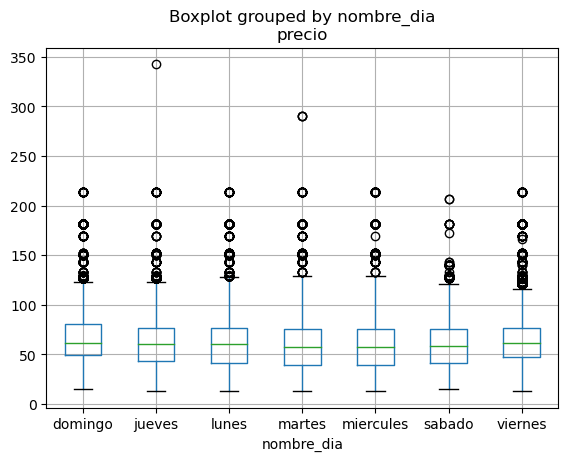

In [ ]:
ciudad_destino_df.boxplot(column=['precio'], by='nombre_dia')

### P14.3: Gráfica el precio medio por día de la semana

<BarContainer object of 7 artists>

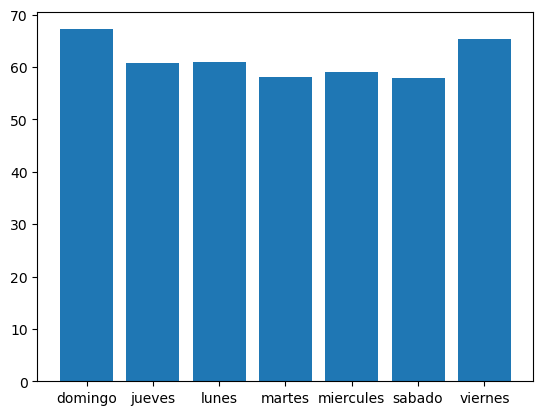

In [ ]:
mean_precio_dia_semana = renfe_df.groupby(['nombre_dia']).mean(['precio'])#sacar la media del precio por el día de la semana
mean_precio_dia_semana
plt.bar(mean_precio_dia_semana.index, mean_precio_dia_semana['precio'])#con el grafico del barra es posible relacionar una variable numérica con una categórica



## P15: Crea un nuevo dataframe donge apliques *one-hot-encoding* a las variables categoricas

In [ ]:
df_copy = ciudad_destino_df.copy()#voy trabajar con una copia del df
df_one_hot = pd.get_dummies(data = df_copy) #dataframe con el one-hot-encoding para todas las variables categoricas
df_one_hot



,ciudad_origen,ciudad_destino,tipo_tren,tipo_tarifa,clase,precio,nueva_fecha,nombre_dia,día,mes,...,hora_inicio_21:10:00,hora_inicio_21:15:00,hora_inicio_21:25:00,hora_inicio_22:00:00,hora_inicio_22:14:00,ciudad_BARCELONA,ciudad_MADRID,ciudad_PONFERRADA,ciudad_SEVILLA,ciudad_VALENCIA
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,2019-06-28,viernes,28,06,...,0,0,0,0,0,0,1,0,0,0
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,2019-07-14,domingo,14,07,...,0,0,0,0,0,1,0,0,0,0
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,2019-05-23,jueves,23,05,...,0,0,0,0,0,0,0,0,1,0
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,2019-05-29,miercules,29,05,...,0,0,0,0,0,0,0,0,0,1
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,2019-06-26,miercules,26,06,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383563,MADRID,VALENCIA,AVE,Flexible,Turista,73.10,2019-05-10,viernes,10,05,...,0,0,0,0,0,0,0,0,0,0
383564,BARCELONA,MADRID,AVE,Promo,Preferente,54.45,2019-08-05,lunes,05,08,...,0,0,0,0,0,0,0,0,0,0
383565,VALENCIA,MADRID,AVE,Promo,Turista,27.80,2019-04-29,lunes,29,04,...,0,0,0,0,0,0,0,0,0,0
383566,MADRID,SEVILLA,AVE,Promo,Turista,47.30,2019-07-07,domingo,07,07,...,0,0,0,0,0,0,0,0,0,0
